In [35]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import matplotlib.pyplot as plt

In [29]:
def show_images_labels_predictions(images,labels,predictions,start_id,num=10):#查看多筆訓練資料(數字圖片,真實值,預測值,起始資料,顯示圖片個數)
    plt.gcf().set_size_inches(12,14)
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5, i+1)#顯示黑白圖片
        ax.imshow(images[start_id], cmap = "binary")
        
        #有 AI預測結果資料,才在標題顯示預測結果
        if( len(predictions)>0):
            title = 'ai = ' +str(predictions[i])
            #預測正確顯示(O) 錯誤顯示(X)
            title += (' (O)' if predictions[i] == labels[i] else ' (X)')
            title += '\nlabel = ' + str(labels[i])
        #沒有AI預測結果資料，只在標題顯示真實數值
        else:
            title = 'label = ' +str(labels[i])
            
        #X,Y 軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([]);ax.set_yticks([])
        start_id += 1
    plt.show

In [ ]:
#資料預處理

In [ ]:
# 1.載入資料

In [3]:
(train_feature ,train_label),(test_feature , test_label) = mnist.load_data()

In [ ]:
# Feature 特徵值轉換

In [4]:
train_feature_vector =  train_feature.reshape(len(train_feature),28,28,1).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28,1).astype('float32')

In [ ]:
# Feature 特徵值標準化

In [5]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [ ]:
# 轉換 one-hot-encoding

In [8]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [ ]:
# 建立 Sequential模型

In [11]:
model = Sequential()

In [ ]:
# 建立卷積層 1 : 產生10張28*28的卷積運算圖片

In [13]:
model.add(Conv2D(filters = 10,             #設定10個濾鏡
                 kernel_size = (3,3),      #濾鏡大小3*3
                 padding = 'same',         #設定與原始大小相同的眷積運算圖片
                 input_shape = (28,28,1),  #原始圖片大小28*28
                 activation = 'relu'))     #激勵函式relu:將小於0的資訊設定為0

In [ ]:
# 建立池化層 1 : 產生10張14*14的卷積運算圖片

In [14]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# 建立卷積層 2 : 產生20張14*14的卷積運算圖片

In [15]:
model.add(Conv2D(filters = 20,             #設定20個濾鏡
                 kernel_size = (3,3),      #濾鏡大小3*3
                 padding = 'same',         #設定與原始大小相同的眷積運算
                 activation = 'relu'))     #激勵函式relu:將小於0的資訊設定為0

In [ ]:
# 建立池化層 2 :產生20張7*7的卷積運算圖片

In [16]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#建立拋棄層 : 防止overfitting 拋棄比例20%

In [17]:
model.add(Dropout(0.2))

In [19]:
#建立平坦層 : 將池化2的圖轉為 20*7*7=980的一維向量(為神經元數目)

In [21]:
model.add(Flatten())

In [ ]:
#建立隱藏層 : 建立256個神經元數目隱藏層

In [22]:
model.add(Dense(units = 256 ,activation = 'relu'))

In [23]:
#建立輸出層  : 建立10層輸出，激勵函式為softmax

In [24]:
model.add(Dense(units = 10 ,activation = 'softmax'))

In [ ]:
#訓練模型 

In [ ]:
#設定訓練方法 : 以compile方法定義loss損失函式 optimizer與metrics

In [26]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#進行訓練 : 用fit方法進行訓練，訓練資料保留20%做驗證，因此訓練資料有0.8*60000=48000筆，驗證資料有0.2*60000=12000筆，訓練10次，每次讀200

In [27]:
train_history = model.fit(x = train_feature_normalize,
                          y = train_label_onehot,
                          validation_split = 0.2, 
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 44s - loss: 0.3619 - accuracy: 0.8931 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 2/10
 - 42s - loss: 0.0906 - accuracy: 0.9722 - val_loss: 0.0605 - val_accuracy: 0.9822
Epoch 3/10
 - 42s - loss: 0.0623 - accuracy: 0.9801 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 4/10
 - 42s - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 5/10
 - 42s - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 6/10
 - 42s - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 7/10
 - 42s - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0406 - val_accuracy: 0.9878
Epoch 8/10
 - 42s - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 9/10
 - 42s - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 10/10
 - 42s - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0342 - val_accuracy: 0.9902


In [ ]:
#評估準確率 : evaluate 可評估模型的損失函式誤差值跟準確率，第0個元素為誤差值，第1個為準確率

In [28]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率 = ',scores[1])

10000/10000 [==============================] - 3s 327us/step

準確率 =  0.9923999905586243


In [ ]:
#進行預測 :以predict_classes 進行預測

In [31]:
prediction = model.predict_classes(test_feature_normalize)

In [ ]:
#顯示訓練好的模型 對Mnist對資料集前10筆預測的結果

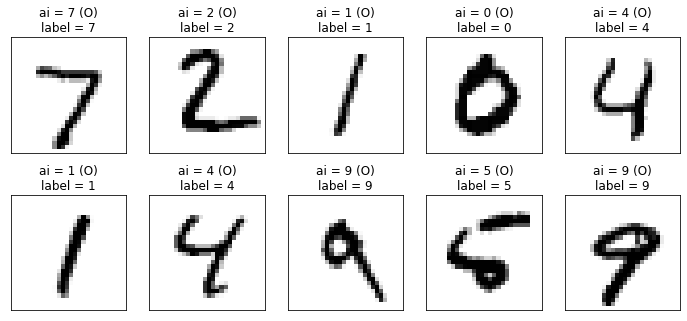

In [36]:
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [ ]:
#儲存模型

In [37]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

#將 Features 特徵值換為 60000*28*28*1 的 4 維矩陣
train_feature_vector =train_feature.reshape(len(train_feature), 28,28,1).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 28,28,1).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

#建立模型
model = Sequential()
#建立卷積層1
model.add(Conv2D(filters=10, 
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

#建立池化層1
model.add(MaxPooling2D(pool_size=(2, 2))) #(10,14,14)

#建立卷積層2
model.add(Conv2D(filters=20, 
                 kernel_size=(5,5),  
                 padding='same',
                 activation='relu'))

#建立池化層2
model.add(MaxPooling2D(pool_size=(2, 2))) #(20,7,7)

# Dropout層防止過度擬合，斷開比例:0.2
model.add(Dropout(0.2))

#建立平坦層：20*7*7=980 個神經元
model.add(Flatten()) 

#建立隱藏層
model.add(Dense(units=256, activation='relu'))

#建立輸出層
model.add(Dense(units=10,activation='softmax'))

# 這些訓練會累積，準確會愈來愈高
try:
    model.load_weights("Mnist_cnn_model.weight")
    print("載入模型參數成功，繼續訓練模型!")
except :    
    print("載入模型失敗，開始訓練一個新模型!")

#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)
#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])
    
# 儲存模型
model.save('Mnist_cnn_model.h5')
print("\nMnist_cnn_model.h5 模型儲存完畢!")
model.save_weights("Mnist_cnn_model.weight")
print("Mnist_cnn_model.weight 模型參數儲存完畢!")

del model       


載入模型失敗，開始訓練一個新模型!
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 36s - loss: 0.3285 - accuracy: 0.9028 - val_loss: 0.0857 - val_accuracy: 0.9737
Epoch 2/10
 - 36s - loss: 0.0844 - accuracy: 0.9739 - val_loss: 0.0565 - val_accuracy: 0.9822
Epoch 3/10
 - 36s - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.0448 - val_accuracy: 0.9865
Epoch 4/10
 - 35s - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0441 - val_accuracy: 0.9857
Epoch 5/10
 - 35s - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 6/10
 - 35s - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0391 - val_accuracy: 0.9882
Epoch 7/10
 - 35s - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 8/10
 - 36s - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 9/10
 - 36s - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 10/10
 - 36s - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0344 - val_accuracy

In [ ]:
#載入模型

載入模型 Mnist_cnn_model.h5


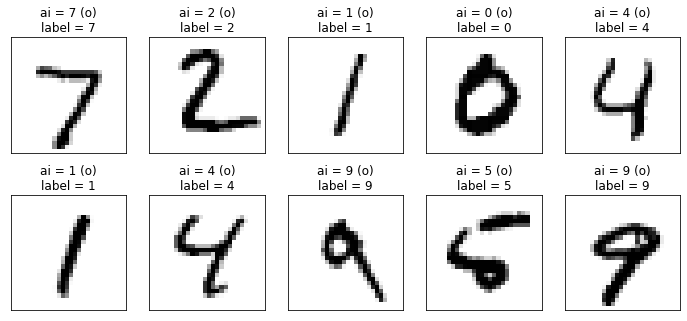

In [38]:
import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#將 Features 特徵值換為 10000*28*28*1 的 4 維矩陣
test_feature_vector = test_feature.reshape(len(test_feature),28,28,1).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_cnn_model.h5")
model = load_model('Mnist_cnn_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [ ]:
#預測自己的數字

載入模型 Mnist_cnn_model.h5


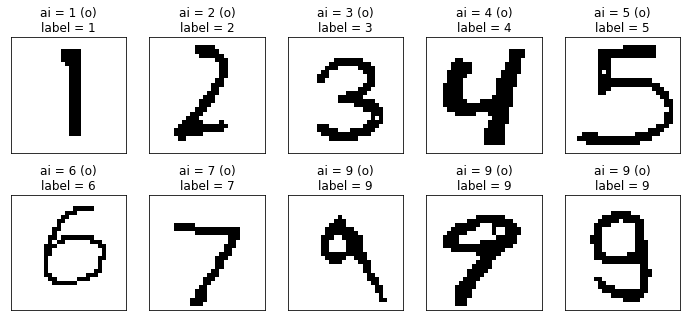

In [39]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()
    
#建立測試特徵集、測試標籤	    
files = glob.glob("imagedata\*.jpg" )
test_feature=[]
test_label=[]
for file in files:
    img=cv2.imread(file)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #灰階    
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) #轉為反相黑白 
    test_feature.append(img)
    label=file[10:11]  # "imagedata\1.jpg" 第10個字元1為label
    test_label.append(int(label))
   
test_feature=np.array(test_feature) # 串列轉為矩陣 
test_label=np.array(test_label)     # 串列轉為矩陣

#將 Features 特徵值換為 10000*28*28*1 的 4 維矩陣
test_feature_vector = test_feature.reshape(len(test_feature),28,28,1).astype('float32')

#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255

#從 HDF5 檔案中載入模型
print("載入模型 Mnist_cnn_model.h5")
model = load_model('Mnist_cnn_model.h5')
    
#預測
prediction=model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0,len(test_feature))